In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-data/preprocessed_700.csv


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
df =pd.read_csv("/kaggle/input/crop-data/preprocessed_700.csv")
df.head(6)

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall
5,Apple,High,Short Day Period,10:10:10,16.899086,2008.480257,6.505550,13.005758,809.958667,93.350667,92.350033,41.797624,169.463620,11.724087,low_acidic,Sandy Loam,Fall


Splitting the n-p-k ratios and creating seperate columsSplitting the n-p-k ratios and creating seperate colums

In [47]:
nitrogen_ratio = []
phosphorus_ratio = []
potassium_ratio = []

for data in df['N-P-K Ratio']:
  ratio = data.split(':')
  nitrogen_ratio.append(float(ratio[0]))
  phosphorus_ratio.append(float(ratio[1]))
  potassium_ratio.append(float(ratio[2]))

In [48]:
df['Nitrogen_Ratio'] = nitrogen_ratio
df['Phosphorus_Ratio'] = phosphorus_ratio
df['Potassium_Ratio'] = potassium_ratio

In [49]:
df.head()

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall,10.0,10.0,10.0
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring,10.0,10.0,10.0
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall,10.0,10.0,10.0


Dropping the features,which are not relevant

In [50]:
df1=df.drop(["pH","Yield",'N-P-K Ratio'],axis='columns')
df1.head(5)

,Name,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,Apple,High,Day Neutral,21.063204,1932.402709,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
1,Apple,High,Day Neutral,19.511305,1589.295994,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,neutral,Sandy Loam,Fall,10.0,10.0,10.0
2,Apple,High,Day Neutral,23.045662,1269.789133,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
3,Apple,High,Short Day Period,17.986016,1944.180144,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,neutral,Sandy Loam,Spring,10.0,10.0,10.0
4,Apple,High,Day Neutral,23.775354,1790.352815,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,neutral,Sandy Loam,Fall,10.0,10.0,10.0


# Scaling Numeric Features

In [51]:
cols_to_scale=['Temperature','Rainfall','Light_Hours','Light_Intensity','Rh','Nitrogen','Phosphorus','Potassium','Nitrogen_Ratio','Phosphorus_Ratio','Potassium_Ratio']

scaler=MinMaxScaler()

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [45]:
df1

,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,High,Day Neutral,0.383117,0.640660,0.656983,0.824977,0.896505,0.133100,0.078339,0.267268,low_acidic,Sandy Loam,Fall,0.071429,0.126984,0.153846
1,High,Day Neutral,0.332332,0.496280,0.727892,0.760025,0.891028,0.142683,0.069119,0.264345,neutral,Sandy Loam,Fall,0.071429,0.126984,0.153846
2,High,Day Neutral,0.447993,0.361831,0.623937,0.877614,0.883962,0.119522,0.073621,0.236016,low_acidic,Sandy Loam,Fall,0.071429,0.126984,0.153846
3,High,Short Day Period,0.282417,0.645616,0.678289,0.889938,0.897435,0.120961,0.088776,0.254874,neutral,Sandy Loam,Spring,0.071429,0.126984,0.153846
4,High,Day Neutral,0.471872,0.580885,0.672335,0.784696,0.872293,0.138324,0.093429,0.255688,neutral,Sandy Loam,Fall,0.071429,0.126984,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23795,Moderate,Short Day Period,0.290647,0.281788,0.160002,0.258586,0.502213,0.298835,0.102929,0.164606,neutral,Sandy,Fall,0.000000,0.126984,0.153846
23796,Moderate,Short Day Period,0.237180,0.230715,0.152791,0.290709,0.526338,0.282045,0.090786,0.158920,neutral,Sandy,Fall,0.000000,0.126984,0.153846
23797,Moderate,Short Day Period,0.091571,0.226380,0.162197,0.264151,0.512865,0.289507,0.084167,0.156725,low_acidic,Sandy,Fall,0.000000,0.126984,0.153846
23798,Moderate,Short Day Period,0.266285,0.191034,0.148487,0.243592,0.495158,0.282331,0.090088,0.154704,low_acidic,Sandy,Spring,0.000000,0.126984,0.153846


Setting the target variables

In [52]:
df_target=df1['Name']
df_target

0             Apple
1             Apple
2             Apple
3             Apple
4             Apple
            ...    
23795    Green Peas
23796    Green Peas
23797    Green Peas
23798    Green Peas
23799    Green Peas
Name: Name, Length: 23800, dtype: object

In [53]:
df1=df1.drop(['Name'],axis="columns")
df1

,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,High,Day Neutral,0.383117,0.640660,0.656983,0.824977,0.896505,0.133100,0.078339,0.267268,low_acidic,Sandy Loam,Fall,0.071429,0.126984,0.153846
1,High,Day Neutral,0.332332,0.496280,0.727892,0.760025,0.891028,0.142683,0.069119,0.264345,neutral,Sandy Loam,Fall,0.071429,0.126984,0.153846
2,High,Day Neutral,0.447993,0.361831,0.623937,0.877614,0.883962,0.119522,0.073621,0.236016,low_acidic,Sandy Loam,Fall,0.071429,0.126984,0.153846
3,High,Short Day Period,0.282417,0.645616,0.678289,0.889938,0.897435,0.120961,0.088776,0.254874,neutral,Sandy Loam,Spring,0.071429,0.126984,0.153846
4,High,Day Neutral,0.471872,0.580885,0.672335,0.784696,0.872293,0.138324,0.093429,0.255688,neutral,Sandy Loam,Fall,0.071429,0.126984,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23795,Moderate,Short Day Period,0.290647,0.281788,0.160002,0.258586,0.502213,0.298835,0.102929,0.164606,neutral,Sandy,Fall,0.000000,0.126984,0.153846
23796,Moderate,Short Day Period,0.237180,0.230715,0.152791,0.290709,0.526338,0.282045,0.090786,0.158920,neutral,Sandy,Fall,0.000000,0.126984,0.153846
23797,Moderate,Short Day Period,0.091571,0.226380,0.162197,0.264151,0.512865,0.289507,0.084167,0.156725,low_acidic,Sandy,Fall,0.000000,0.126984,0.153846
23798,Moderate,Short Day Period,0.266285,0.191034,0.148487,0.243592,0.495158,0.282331,0.090088,0.154704,low_acidic,Sandy,Spring,0.000000,0.126984,0.153846


Splitting the dataset into train and test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df1, df_target, test_size=0.3, random_state=42)

In [56]:
X_train.head()

,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
9237,Moderate,Long Day Period,0.557229,0.179054,0.609153,0.541607,0.917509,0.122454,0.079872,0.256976,acidic,Loam,Spring,0.071429,0.126984,0.153846
6076,High,Short Day Period,0.505401,0.429397,0.666412,0.397722,0.826818,0.340819,0.132434,0.238058,neutral,Sandy Loam,Spring,0.014286,0.000000,0.030769
9427,Moderate,Day Neutral,0.698007,0.136079,0.572993,0.658937,0.905812,0.107589,0.084539,0.249076,acidic,Loam,Fall,0.071429,0.126984,0.153846
19193,Moderate,Short Day Period,0.397540,0.285037,0.291222,0.450577,0.658390,0.844068,0.381011,0.926265,low_acidic,Loam,Spring,0.071429,0.126984,0.153846
4941,High,Short Day Period,0.582971,0.497037,0.617066,0.162467,0.881739,0.149497,0.120066,0.177479,low_acidic,Loam,Summer,0.071429,0.126984,0.000000


# OneHotEncoding the Categorical Features

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type', 'Season']),
    remainder='passthrough')
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

# Modelling Classification Algorithms

In [64]:
acc = []
model = []

# **Decision Tree**

In [65]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
from sklearn.metrics import classification_report
from sklearn import metrics

DT.fit(X_train,y_train)

predicted_values = DT.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  87.3389355742297


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

         Apple       1.00      1.00      1.00       208
       Arugula       1.00      1.00      1.00       202
     Asparagus       0.49      1.00      0.66       219
          Beet       0.00      0.00      0.00       214
     Blueberry       1.00      1.00      1.00       220
      Broccoli       1.00      0.99      0.99       206
       Cabbage       0.99      0.98      0.99       200
  Cauliflowers       1.00      1.00      1.00       208
         Chard       1.00      1.00      1.00       220
      Cherries       0.49      1.00      0.66       208
Chilli Peppers       0.00      0.00      0.00       228
         Cress       1.00      1.00      1.00       211
     Cucumbers       0.00      0.00      0.00       225
     Eggplants       1.00      1.00      1.00       213
        Endive       0.52      1.00      0.68       220
          Figs       1.00      1.00      1.00       202
        Grapes       0.00      0.00      0.00  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
dt_train_accuracy = DT.score(X_train,y_train)
print("Training accuracy = ",DT.score(X_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(X_test,y_test)
print("Testing accuracy = ",DT.score(X_test,y_test))

Training accuracy =  0.8848739495798319
Testing accuracy =  0.8733893557422969


# K-Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

predicted_values = knn.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  1.0
                precision    recall  f1-score   support

         Apple       1.00      1.00      1.00       208
       Arugula       1.00      1.00      1.00       202
     Asparagus       1.00      1.00      1.00       219
          Beet       1.00      1.00      1.00       214
     Blueberry       1.00      1.00      1.00       220
      Broccoli       1.00      1.00      1.00       206
       Cabbage       1.00      1.00      1.00       200
  Cauliflowers       1.00      1.00      1.00       208
         Chard       1.00      1.00      1.00       220
      Cherries       1.00      1.00      1.00       208
Chilli Peppers       1.00      1.00      1.00       228
         Cress       1.00      1.00      1.00       211
     Cucumbers       1.00      1.00      1.00       225
     Eggplants       1.00      1.00      1.00       213
        Endive       1.00      1.00      1.00       220
          Figs       1.00      1.00      1.00       202
        Grapes       1.00

In [70]:
knn_train_accuracy = knn.score(X_train,y_train)
print("knn_train_accuracy = ",knn.score(X_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(X_test,y_test)
print("knn_test_accuracy = ",knn.score(X_test,y_test))

knn_train_accuracy =  0.9998799519807923
knn_test_accuracy =  1.0


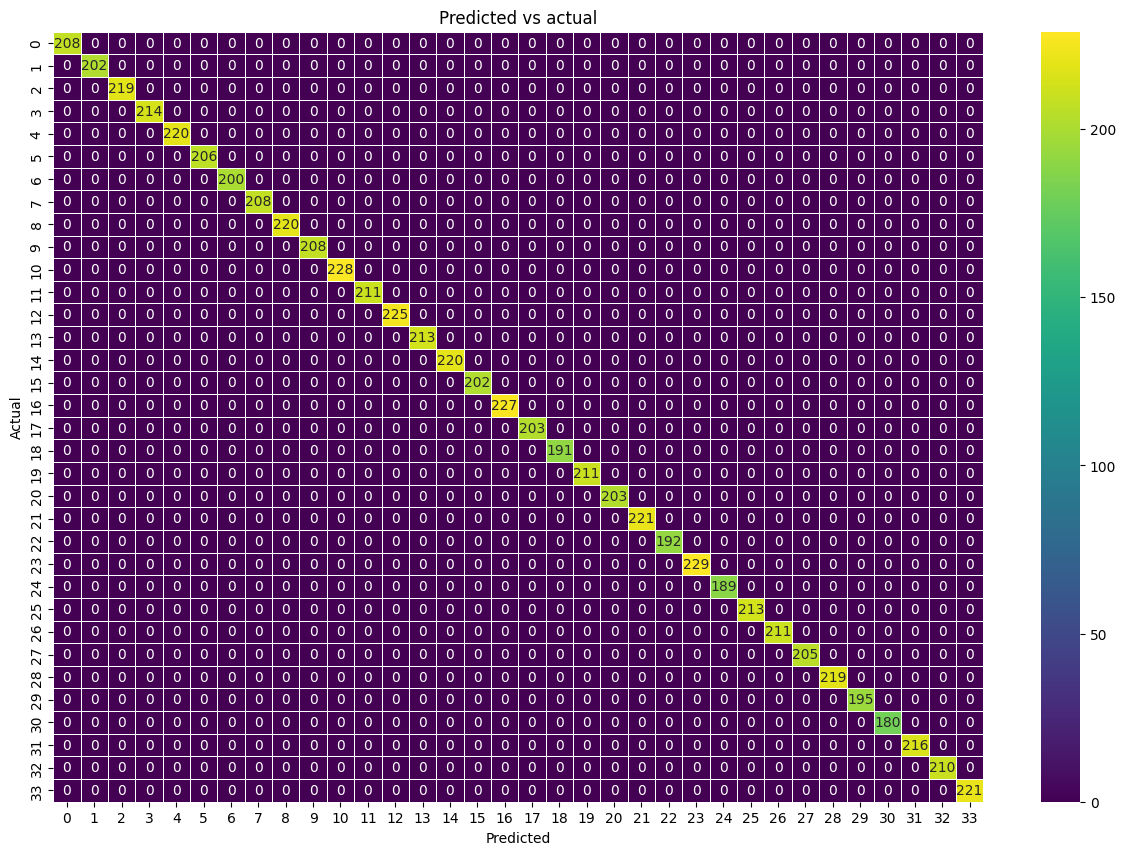

In [73]:
y_pred = knn.predict(X_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  1.0
                precision    recall  f1-score   support

         Apple       1.00      1.00      1.00       208
       Arugula       1.00      1.00      1.00       202
     Asparagus       1.00      1.00      1.00       219
          Beet       1.00      1.00      1.00       214
     Blueberry       1.00      1.00      1.00       220
      Broccoli       1.00      1.00      1.00       206
       Cabbage       1.00      1.00      1.00       200
  Cauliflowers       1.00      1.00      1.00       208
         Chard       1.00      1.00      1.00       220
      Cherries       1.00      1.00      1.00       208
Chilli Peppers       1.00      1.00      1.00       228
         Cress       1.00      1.00      1.00       211
     Cucumbers       1.00      1.00      1.00       225
     Eggplants       1.00      1.00      1.00       213
        Endive       1.00      1.00      1.00       220
          Figs       1.00      1.00      1.00       202
        Grapes 

In [80]:
#Print Train Accuracy
rf_train_accuracy = RF.score(X_train,y_train)
print("Training accuracy = ",RF.score(X_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(X_test,y_test)
print("Testing accuracy = ",RF.score(X_test,y_test))

Training accuracy =  1.0
Testing accuracy =  1.0


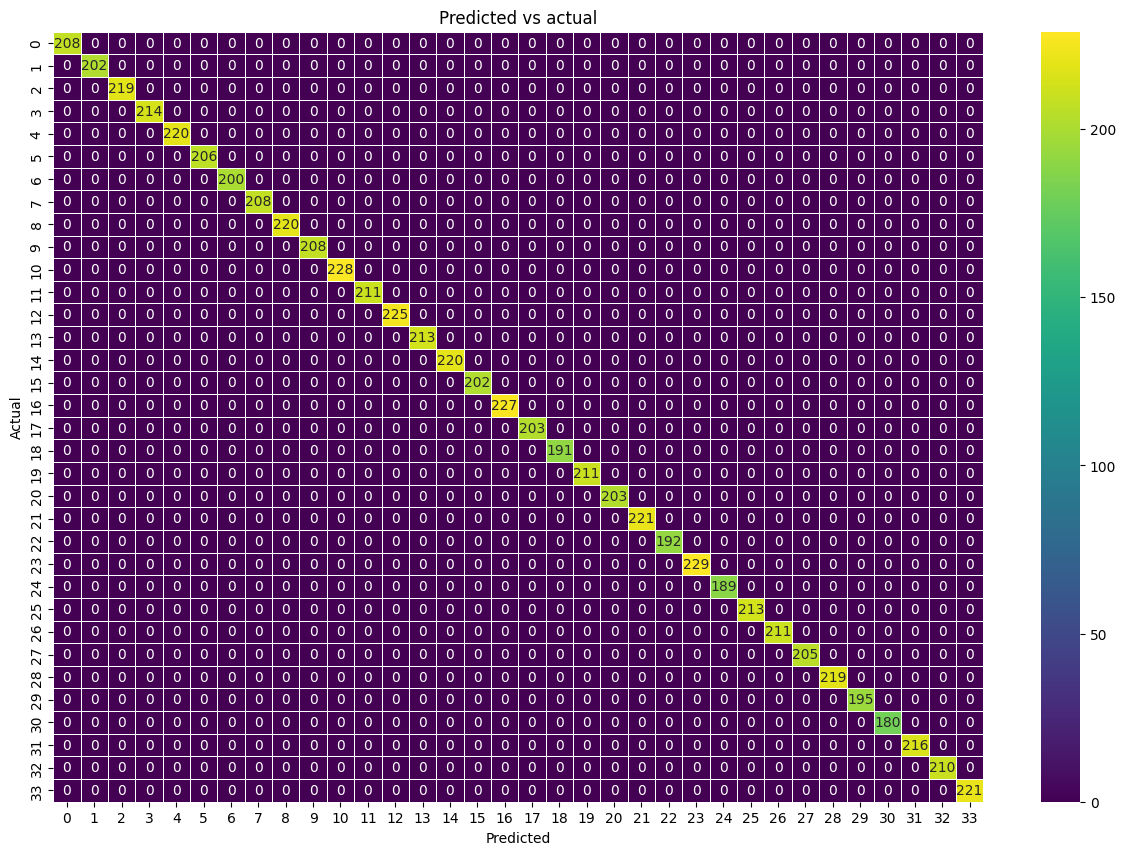

In [81]:
y_pred = RF.predict(X_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Naive Bayes Classifier

In [83]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.999859943977591
                precision    recall  f1-score   support

         Apple       1.00      1.00      1.00       208
       Arugula       1.00      1.00      1.00       202
     Asparagus       1.00      1.00      1.00       219
          Beet       1.00      1.00      1.00       214
     Blueberry       1.00      1.00      1.00       220
      Broccoli       1.00      1.00      1.00       206
       Cabbage       1.00      1.00      1.00       200
  Cauliflowers       1.00      1.00      1.00       208
         Chard       1.00      1.00      1.00       220
      Cherries       1.00      1.00      1.00       208
Chilli Peppers       1.00      1.00      1.00       228
         Cress       1.00      1.00      1.00       211
     Cucumbers       1.00      1.00      1.00       225
     Eggplants       1.00      1.00      1.00       213
        Endive       1.00      1.00      1.00       220
          Figs       1.00      1.00      1.00       202
   

In [85]:
nb_train_accuracy = NaiveBayes.score(X_train,y_train)
print("Training accuracy = ",NaiveBayes.score(X_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(X_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(X_test,y_test))

Training accuracy =  0.9998799519807923
Testing accuracy =  0.999859943977591


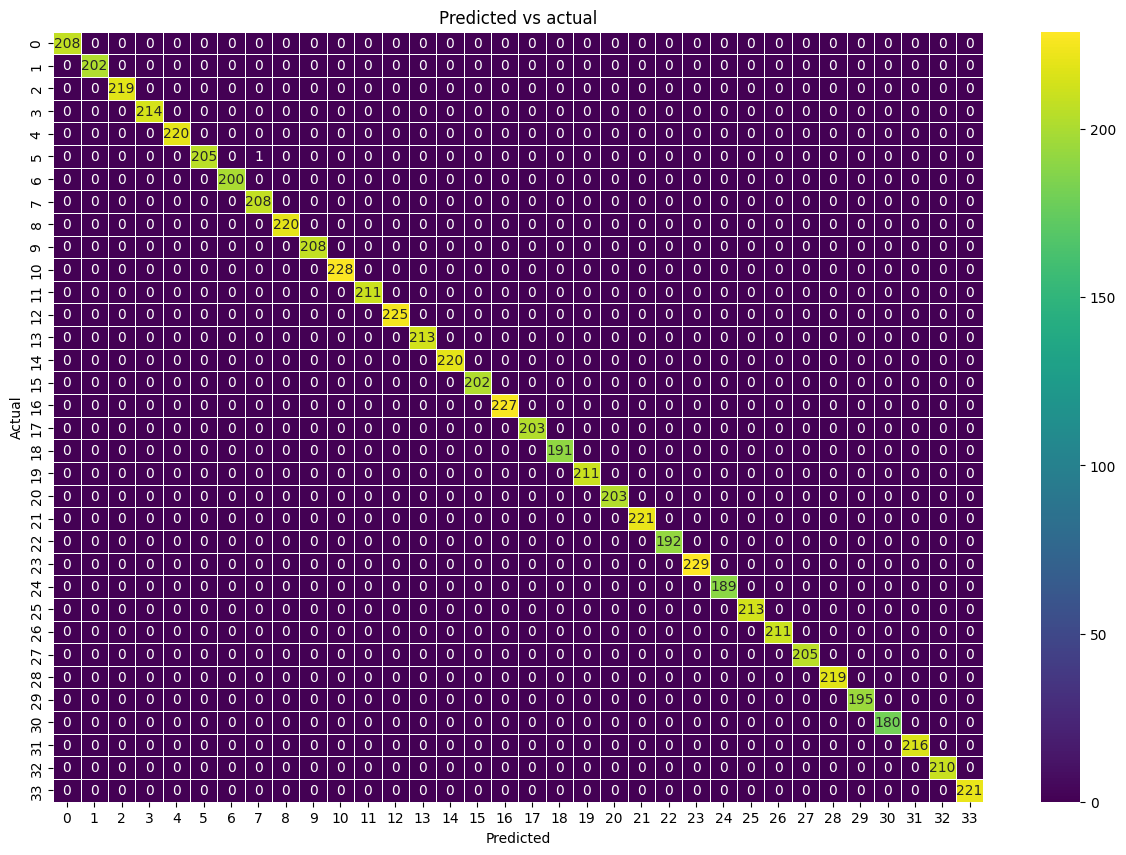

In [86]:
y_pred = NaiveBayes.predict(X_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()


# XGBoost

In [98]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost Accuracy is:  0.9994397759103641
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00       219
           3       1.00      1.00      1.00       214
           4       1.00      1.00      1.00       220
           5       1.00      1.00      1.00       206
           6       0.99      1.00      0.99       200
           7       1.00      0.99      1.00       208
           8       1.00      1.00      1.00       220
           9       1.00      1.00      1.00       208
          10       1.00      1.00      1.00       228
          11       1.00      1.00      1.00       211
          12       1.00      1.00      1.00       225
          13       1.00      1.00      1.00       213
          14       1.00      1.00      1.00       220
          15       1.00      1.00      1.00       202
          16       1.00      1.00      1

In [101]:
XB_train_accuracy = XB.score(X_train,y_train)
print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_test_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9994397759103641


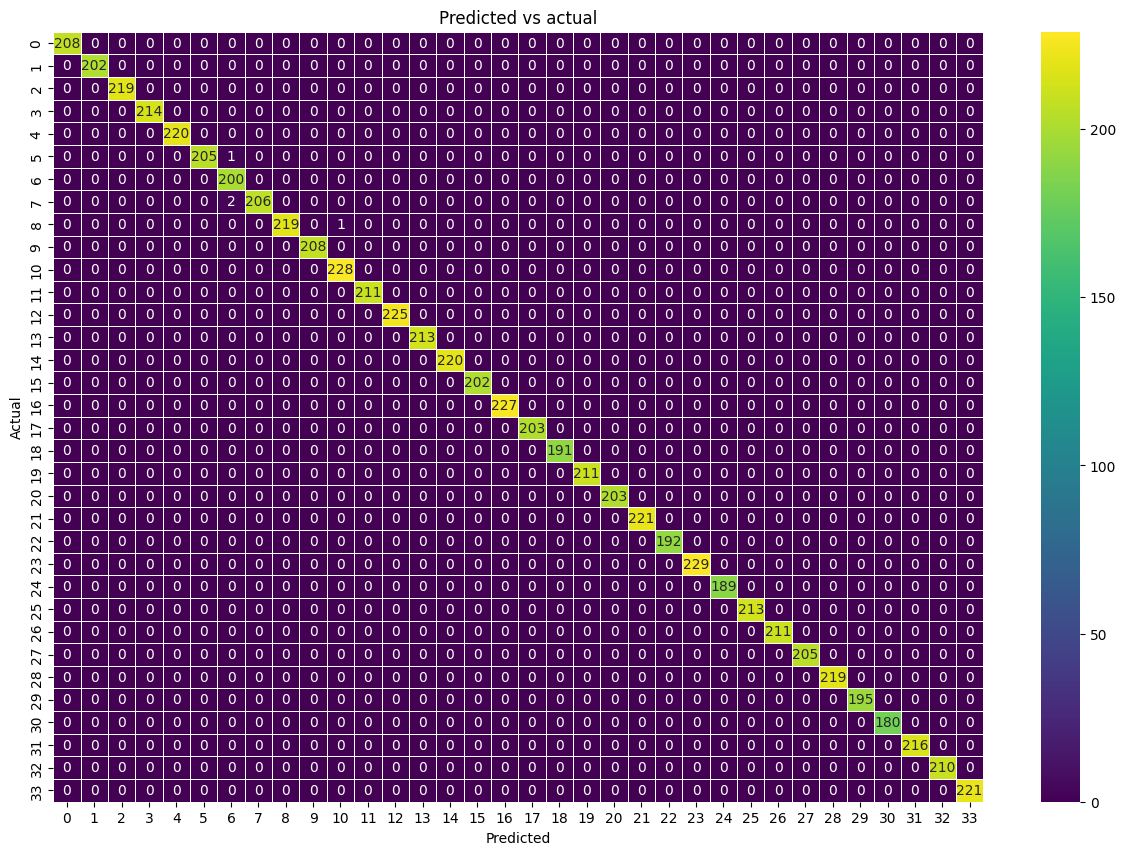

In [103]:
y_pred = XB.predict(X_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# **Accuracy Comparison**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


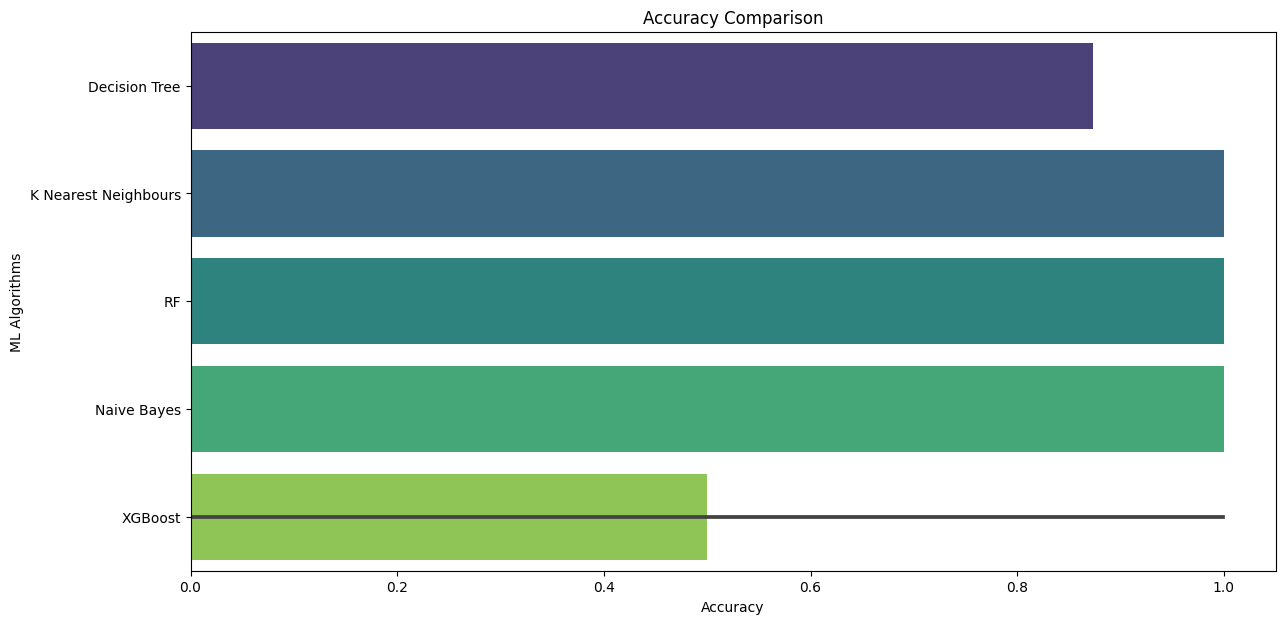

In [104]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

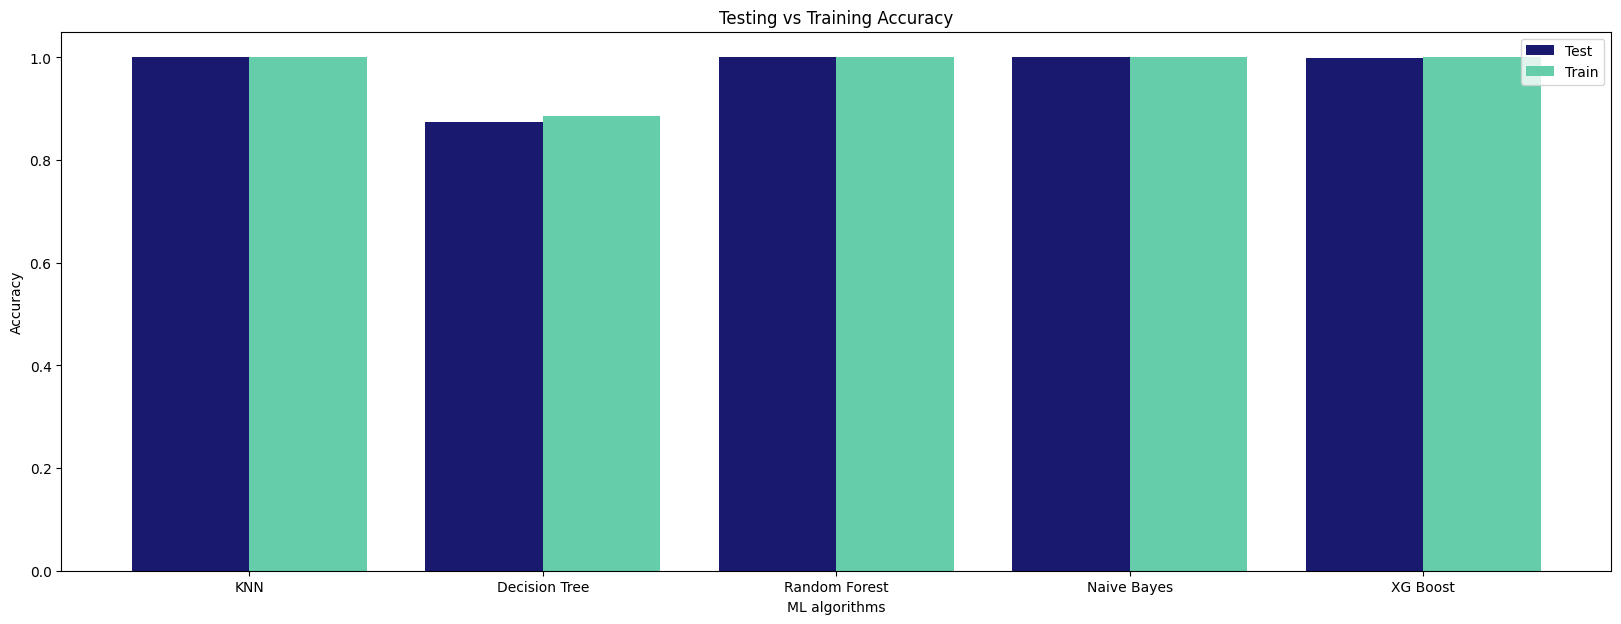

In [105]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes','XG Boost']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy,XB_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, XB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()
